# Homework #7: Second-Order Methods
|Author| Stanley A. Baronett|
|--|-------------------------------|
|Created | 7/9/2020|

## Required Libraries

In [123]:
using LinearAlgebra
using Plots
using ForwardDiff

# Rosenbrock Function

In [124]:
f(x) = (1 - x[1])^2 + 100*(4x[2] - x[1]^2)^2
∇f(x) = [2*(200x[1]^3 - 800x[1]*x[2] + x[1] - 1),
         -800*(x[1]^2 - 4x[2])]
H(x) = [[1200x[1]^2 - 1600x[2] + 2, -1600x[1]] [-1600x[1], 3200]]; # analytic
# H(x) = ForwardDiff.hessian(f, x); # numerical

In [125]:
function rosenplot(ticks=false, grid=false, legend=false)
    f_banana(x, y) = (1 - x)^2 + 100*(4y - x^2)^2
    x, y = -4.2:0.01:3.2, -2.1:0.01:1.6
    contour(x, y, f_banana,
        size=(500, 250),
        framestyle=:box,
        color=cgrad(:viridis, rev=true),
        levels=[2,10,50,200,500,1000,2000,4000,8000],
        clims=(0, 8001),
        legend=legend,
        xlims=(-4.2, 3.2),
        ylims=(-2.1, 1.6),
        grid=grid,
        ticks=ticks,
        xlabel="x₁",
        ylabel="x₂")
end;

# Newton's Method

In [130]:
function newtons_method(∇f, H, x, ϵ=1e-8, k_max=20)
    k, Δ = 1, fill(Inf, length(x))
    xs = copy(x)'
    while norm(Δ) > ϵ && k ≤ k_max
        Δ = H(x) \ ∇f(x)
        x -= Δ
        k += 1
        xs = [xs; x']
    end
    println("No. of iterations: ", k)
    return xs
end;

No. of iterations: 7


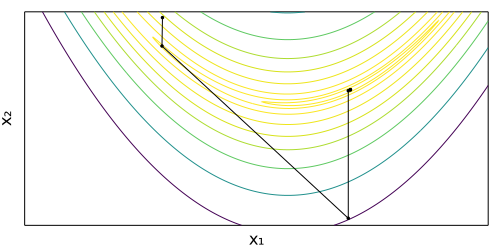

In [119]:
x0 = [-2, 1.5]
xs1 = newtons_method(∇f, H, x0)

rosenplot()
plot!(xs1[:,1], xs1[:,2], color=:black)
scatter!(xs1[:,1], xs1[:,2], ms=2, color=:black)

No. of iterations: 7


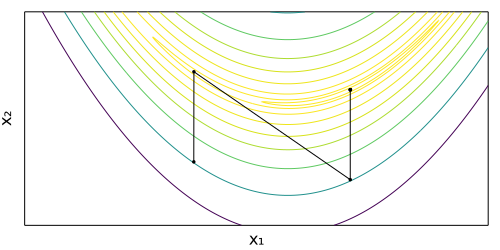

In [179]:
x0 = [-1.5, -1]
xs1 = newtons_method(∇f, H, x0)

rosenplot()
plot!(xs1[:,1], xs1[:,2], color=:black)
scatter!(xs1[:,1], xs1[:,2], ms=2, color=:black)

# Secant Method

*From textbook*:
> Newton’s method for **univariate** function minimization requires the first and
second derivatives $f'$ and $f''$. In many cases, $f'$ is known but the second derivative
is not. The _secant method_ (algorithm 6.2) applies Newton’s method using estimates
of the second derivative and thus only requires $f'$. This property makes the secant
method more convenient to use in practice.

Since the _secant method_ approximates the _second derivative_, and not the Hessian, it can only be used on univariate functions. For example, observe the trajectory of this method when applied to our Rosenbrock function.

In [134]:
function multivar_secant_method(f′, x0, x1, ϵ=1e-8, k_max=20)
    g0 = f′(x0)
    Δ = Inf
    k = 1
    xs = copy(x0)'
    while norm(Δ) > ϵ && k ≤ k_max
        g1 = f′(x1)
        Δ = (x1 - x0)/(g1 - g0)*g1
        x0, x1, g0 = x1, x1 - Δ, g1
        xs = [xs; x0']
    end
    return xs
end;

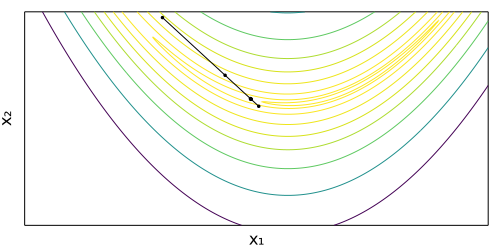

In [181]:
x0 = [-2, 1.5]
x1 = x0 + [1, -1]
N_iter = 20

xs2 = multivar_secant_method(∇f, x0, x1)
rosenplot()
plot!(xs2[:,1], xs2[:,2], color=:black, label="secant")
scatter!(xs2[:,1], xs2[:,2], ms=2, color=:black, label="secant")

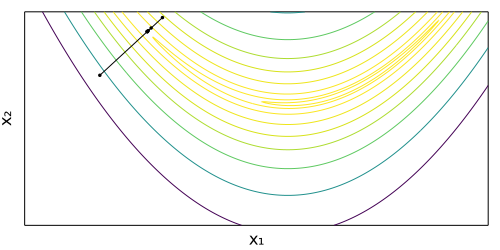

In [180]:
x0 = [-2, 1.5]
x1 = x0 + [-1, -1]
N_iter = 20

xs2 = multivar_secant_method(∇f, x0, x1)
rosenplot()
plot!(xs2[:,1], xs2[:,2], color=:black, label="secant")
scatter!(xs2[:,1], xs2[:,2], ms=2, color=:black, label="secant")

Although it overshoots, the method eventually settles at the bottom of the valley but never deviates from its initial direction.

# Univariate Function

In [232]:
function secant_method(f′, x0, x1, ϵ = 1e-8)
    g0 = f′(x0)
    Δ = Inf
    xs = [x0]
    k = 0
    while abs(Δ) > ϵ
        g1 = f′(x1)
        Δ = (x1 - x0)/(g1 - g0)*g1
        x0, x1, g0 = x1, x1 - Δ, g1
        xs = [xs; x0]
        k += 1
    end
    println("No. of iterations: ", k)
    return xs
end;

No. of iterations: 2


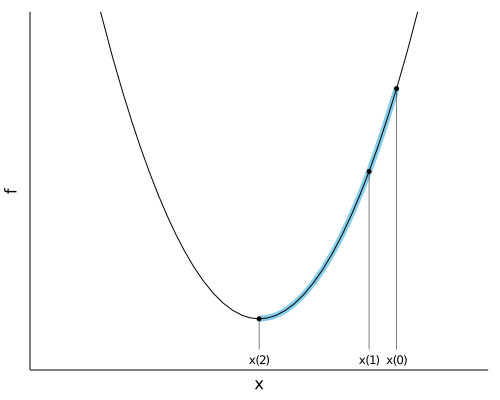

In [235]:
g = x -> x^2
g′ = x -> 2x

x0 = 1.5
x1 = x0 - 0.3
xs3 = secant_method(g′, x0, x1)

plot(g, xs3[end], xs3[1], line=(6, :skyblue))
plot!(g, -2, 2, color=:black, leg=false, grid=false, size=(500, 400))
xaxis!(ylabel="f", xlabel="x", ticks=nothing, xlims=(-2.5, 2.5), ylims=(-0.5, 3))
for i in 1:(length(xs3))
    plot!([xs3[i], xs3[i]], [-0.3, g.(xs3[i])], color=:black, label="", lw=0.5)
    annotate!(xs3[i], -0.4, text(string("x(", (i-1), ")"), 8))
end
scatter!(xs3, g.(xs3), ms=3, color=:black)

No. of iterations: 7


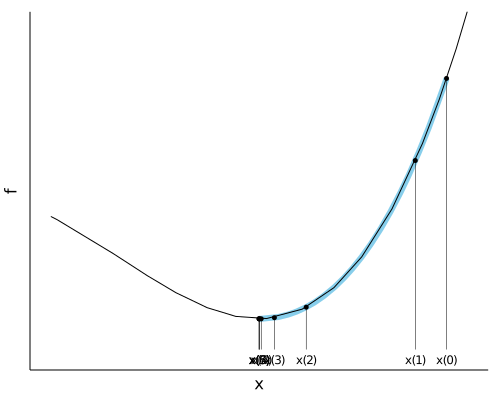

In [249]:
g = x -> x^3+2x^2
g′ = x -> 3x^2 + 4x

x0 = 0.9
x1 = x0 - 0.15
xs3 = secant_method(g′, x0, x1)

plot(g, xs3[end], xs3[1], line=(6, :skyblue))
plot!(g, -1, 2, color=:black, leg=false, grid=false, size=(500, 400))
xaxis!(ylabel="f", xlabel="x", ticks=nothing, xlims=(-1.1, 1.1), ylims=(-0.5, 3))
for i in 1:(length(xs3))
    plot!([xs3[i], xs3[i]], [-0.3, g.(xs3[i])], color=:black, label="", lw=0.5)
    annotate!(xs3[i], -0.4, text(string("x(", (i-1), ")"), 8))
end
scatter!(xs3, g.(xs3), ms=3, color=:black)